<center>
    <img src="./images/ac_header.png">
</center>

### <a target="_blank" rel="noopener noreferrer" href="https://www.tu-ilmenau.de/mt-ams/personen/schuller-gerald/">Prof. Dr. -Ing. Gerald Schuller</a> <br> <a target="_blank" rel="noopener noreferrer" href="https://www.tu-ilmenau.de/mt-ams/lehre/msp-and-adsp-tutorials/">Jupyter Notebook: Renato Profeta</a> 

[Applied Media Systems Group](https://www.tu-ilmenau.de/en/applied-media-systems-group/) <br>
[Technische Universität Ilmenau](https://www.tu-ilmenau.de/)

# Filter Banks II

In [1]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/f1ykTtvWkwM?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

<center>
    <img src='./images/ac_03_critc1.png' width='900'>
</center>

## Modulated Filter Banks - Extending the DCT

Last time we saw that the DCT4 corresponds to a filter bank with impulse responses for the analysis here in time reversed form to simplify the right hand side:

$$\large
h_k(N-1-n)=\cos 
\left( 
    \dfrac{\pi}{N}
    \left(k+\dfrac{1}{2}\right)
    \left(n+\dfrac{1}{2}\right)
\right)
$$

For subband *k* and time index *n* both in the range of 0,...N-1.

With the help of a "baseband prototype" or "window" *h(n)* (independent of *k*):

$$\large
h(n) = \begin{cases}
1 & n=0 \dots N-1 \\
0 & \text{else} 
\end{cases}$$

We can now re-write this as a **"modulated filter”**:

$$\large
h_k(N-1-n)=h(n) \cdot \cos 
\left( 
    \dfrac{\pi}{N}
    \left(k+\dfrac{1}{2}\right)
    \left(n+\dfrac{1}{2}\right)
\right)
$$

with $k=0 \dots N-1$ but now with $-\infty < n < \infty$.

**Observe:** Window function allows to improve filter's parameters like stopband attenuation and transition band width.

## Modulated Filter Banks

In [2]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/CwnDVxlxTrI?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

So called **Modulated Filters** as part of a **Modulated Filter Bank** are defined to have the following general form:

$$\large
h_k(n) = h(n) \cdot \Phi_k(n)$$

- h(n) : window function (not necessarily limited in length)
- $ \Phi_k(n)$ : modulation function, for instance the cosine function
- *$_k$* : frequency index

Another example of filters for so-called **Cosine Modulated Filter Banks**:

$$\large
h_k(n) = h(n) \cdot \cos \left( \dfrac{\pi}{N} (k+0.5)(n+0.5) \right)$$

With the cosine modulation, the resulting frequency responses (using the DTFT) of the filters in the filter bank are:

$$\large
H_k(\omega) = H(\omega) * \dfrac{1}{2} \left[ 
\delta \left( \omega - \dfrac{\pi}{N} \left(k+\dfrac{1}{2} \right) \right) +
\delta \left( \omega + \dfrac{\pi}{N} \left( k + \dfrac{1}{2} \right) \right) \right] $$

**Observe**: 
 - Multiplication in time becomes convolution in frequency.
 - Delta functions $\delta$ come from cosine term.
 
$$\large
=H\left(\omega - \dfrac{\pi}{N} \left(k+\dfrac{1}{2} \right) \right) + 
H\left(\omega + \dfrac{\pi}{N} \left(k+\dfrac{1}{2} \right) \right) \\
\text{shift in frequency}$$

 - Hence: Modulated filter banks obtain their filters by shifting a "baseband filter" h(n) in frequency $-\pi < \omega < \pi$.
 - As a result, we need to design only *h(n)* with high stopband attenuation and perfect reconstruction.

### Frequency Shifts

<center>
    <img src='./images/ac_28_freq_shift.png' width='900'>
</center>

The subbands of the filter bank are frequency shifted versions of the window frequency response:
<center>
    <img src='./images/ac_29_freq_shift2.png' width='700'>
</center>

### The Window Function

<center>
    <img src='./images/ac_30_window.png' width='600'>
</center>

Frequency response of the rectangular window function of the DCT:

<center>
    <img src='./images/ac_31_windowRect.png' width='800'>
</center>

Improve filter banks:
 - make window longer.
 - different window shape.
 
Examples (all have the same principle):
 - TDAC (time domain aliasing cancellation) (Princen and Bradley 1986&1987)
 - LOT (lapped orthogonal transform) (Malvar 1989)
 - MDCT (modified DCT) (Bernd Edler 1988)

### Fast Implementation: Analysis Polyphase Matrix

In [3]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/d4RRK1T5fPI?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

 - Remember: the analysis polyphase matrix is:
 <center>
    <img src='./images/ac_32_polyphaseAnalysis.png' width='600'>
</center>
 
 with the analysis polyphase components:
 
 $$\large
 H_{k,n}= \sum_{m=0}^{\infty} h_k(n+mN) \cdot z^{-m}$$

### The MDCT Filter Bank

 - The so-called MDCT filter bank has a prototype or window length of L=2N, and is defined with its filter impulse responses in the direct implementation as:
     - Analysis filters:
     $$\large
     h_k(L-1-n) = h(n) \cdot \cos \left( \dfrac{\pi}{N} \cdot \left(k+\dfrac{1}{2} \right)
     \left(n+\dfrac{1}{2} - \dfrac{N}{2} \right) \right) \cdot \sqrt{\dfrac{2}{N}}$$
     - Synthesis filters:
     $$\large
     g_k(n)=g(n) \cdot \cos \left( \dfrac{\pi}{N} \cdot \left(k+\dfrac{1}{2} \right)
     \left(n+\dfrac{1}{2} - \dfrac{N}{2} \right) \right) \cdot \sqrt{\dfrac{2}{N}} $$
     
     for $n=0, \dots, 2N-1$;$k=0,\dots,N-1.$
  
<br>
  
 - The resulting Analysis Polyphase matrix is:
 
 <center>
    <img src='./images/ac_33_polyphaseAnalysis2.png' width='700'>
</center>

     - **Observe**: this $h_k(n)$ has length 2N, and is more general than the rectangular window (not just 1 or 0).
     - *H(z)* is composed of **1st order polynomials**.
     - Goal: find "good" h(n)
     

 - Fortunately, the MDCT polyphase matrix can be decomposed into a **product of simpler matrices**, hence easier to invert to obtain perfect reconstruction:
 
   - **Observe** the diamond shaped form of the matrix $F_a(z)$ and the sparse structure.
   - Beneficial for an efficient implementation.


<br>
<center>
    <img src='./images/ac_34_mdct_inv.png' width='900'>
</center>
<br>

 - The MDCT synthesis Polyphase matrix can be similarly decomposed into a product of matrices. Needs to be the inverse and a delay for Perfect Reconstruction (PR).
 
<br>
<center>
    <img src='./images/ac_35_mdct_synth.png' width='900'>
</center>
<br>

## Graphical Interpretation of Analysis Matrix $F_a$

<center>
    <img src='./images/ac_36_faMatA.png' width='900'>
</center>

 - "Folding" the upper and lower quarter of the signal into a length N block (aliasing components).
 - Invertible by matrix inversion containing overlap-add.

<center>
    <img src='./images/ac_37_faMatA1.png' width='400'>
</center>


### MDCT, Perfect Reconstruction

 - DCT matrix *T* and the delay matrix *D(z)* are easily invertible for perfect reconstruction.
 - System Delay results from making inverse of *D(z)* causal (one block), and the blocking delay of N-1 samples.
 - $F_a$ is also easily invertible, with some simple matrix algebra:
 
 <center>
    <img src='./images/ac_38_mdct_PR.png' width='700'>
</center>

### MDCT Filter Banks, Sine Window

In [4]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/sfgTGW2imD4?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

 - Modified Discrete Cosine Transform (MDCT): g(n)=h(n) $\rightarrow$ Denominator=1
 - Example which fulfils this condition:
    - **Sine window**:
    $$\large
    h(n)= \sin \left( \dfrac{\pi}{2N}(n+0.5)\right), \text{for n=0,...,2N-1}$$
    
<center>
    <img src='./images/ac_39_sinWindow.png' width='400'>
</center>

 - System delay=2N-1=1023 for N=512 (from the delay matrices, 1 block of N, and the blocking delay of N- 1)

### Sine-Window Frequency Response

<center>
    <img src='./images/ac_40_sineWindowFR.png' width='700'>
</center>

### MDCT, Advantages

 - Improved frequency responses, higher stopband attenuation.
 - Easy to design filter banks with many subbands (for instance N=1024 for audio coding)
 - Efficient implementation with the shown sparse matrices and a fast DCT. Important for large number of subbands, as in audio coding.

### MDCT Filter Banks, Impulse Responses

Examples: <br>
Filter impulse responses $h_7(n)$, $h_{15}(n)$, N=1024 bands, sine window.

<center>
    <img src='./images/ac_41_sineWinIR.png' width='600'>
</center>


### MDCT Filter Banks, Frequency Responses

<center>
    <img src='./images/ac_42_sineWinFR.png' width='1000'>
</center>


## MDCT Tutorials

In [13]:
%%html
<iframe width="1100" height="600" src="https://nbviewer.jupyter.org/github/GuitarsAI/MRSP_Notebooks/blob/master/MRSP_mdct.ipynb"></iframe>


### MDCT: Python Examples

*Real-time python audio examples: you need a microphone and speakers connected.* <br>
*THESE EXAMPLES WILL NOT WORK ON REMOTE ENVIRONMENTS SUCH AS GOOGLE COLAB AND BINDER:*

In [6]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/4UWe3yQmWIs?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

 - This is an example for the MDCT filter bank. You see a decomposition of the audio signal into MDCT subbands. These subbands can then be processed, for instance we set every subband except for a few to zero. Then we display the result as a spectrogram waterfall diagramm, and use the inverse/synthesis MDCT for reconstrution and play the resulting sound back:

In [1]:
# Imports and Configuration
%matplotlib inline
import numpy as np
import scipy.signal as signal
import pyaudio
import struct
import scipy.fftpack as spfft
from ipywidgets import ToggleButton, Button
from ipywidgets import HBox
import threading
import cv2

In [2]:
# Signal Processing Parameters

N=512                          # Number of subbands and block size
CHUNK_SIZE = N                 # Blocksize
FORMAT = pyaudio.paInt16       # Conversion format for PyAudio stream
CHANNELS = 1                   # Audio Channels
RATE = 32000                   # Sampling Rate in Hz
FFT_LEN = N                    # FFT Length  

rows=500
cols=CHUNK_SIZE
fftlen=cols
frame=0.0*np.ones((rows,cols,3));

In [9]:
#The D(z) matrix:
def Dmatrix(samples):
    #implementation of the delay matrix D(z)
    #Delay elements:
    out=np.zeros(N)
    out[0:int(N/2)]=Dmatrix.z
    Dmatrix.z=samples[0:int(N/2)]
    out[int(N/2):N]=samples[int(N/2):N]
    return out

Dmatrix.z=np.zeros(int(N/2))

In [10]:
#The inverse D(z) matrix:
def Dmatrixinv(samples):
    #implementation of the delay matrix D(z)
    #Delay elements:
    out=np.zeros(N)
    out[int(N/2):N]=Dmatrixinv.z
    Dmatrixinv.z=samples[int(N/2):N]
    out[0:int(N/2)]=samples[0:int(N/2)]
    return out

Dmatrixinv.z=np.zeros(int(N/2))

In [11]:
#The F Matrix:
fcoeff=np.sin(np.pi/(2*N)*(np.arange(0,2*N)+0.5))
Fmatrix=np.zeros((N,N))
Fmatrix[0:int(N/2),0:int(N/2)]=np.fliplr(np.diag(fcoeff[0:int(N/2)]))
Fmatrix[int(N/2):N,0:int(N/2)]=np.diag(fcoeff[int(N/2):N])
Fmatrix[0:int(N/2),int(N/2):N]=np.diag(fcoeff[N:int(N+N/2)])
Fmatrix[int(N/2):N,int(N/2):N]=-np.fliplr(np.diag(fcoeff[int(N+N/2):(2*N)]))

In [12]:
#The inverse F matrix:
Finv=np.linalg.inv(Fmatrix)

In [13]:
#The DCT4 transform:
def DCT4(samples):
    #use a DCT3 to implement a DCT4:
    samplesup=np.zeros(2*N)
    #upsample signal:
    samplesup[1::2]=samples
    y=spfft.dct(samplesup,type=3)/2
    return y[0:N]

In [14]:
#The complete MDCT, Analysis:
def MDCT(samples):
    y=np.dot(samples,Fmatrix)
    y=Dmatrix(y)
    y=DCT4(y)
    return y

In [15]:
#The inverse MDCT, synthesis:
def MDCTinv(y): 
    #inverse DCT4 is identical to DCT4:
    x=DCT4(y)*2/N
    #inverse D(z) matrix
    x=Dmatrixinv(x)
    #inverse F matrix
    x=np.dot(x,Finv)
    return x

In [16]:
# GUI
toggle_run = ToggleButton(description='Stop')
button_start= Button(description='Start')

def start_button(button_start):
    thread.start()
    button_start.disabled=True
button_start.on_click(start_button)


def on_click_toggle_run(change):
    if change['new']==False:
        stream.stop_stream()
        stream.close()
        p.terminate()
        cv2.destroyAllWindows()
        plt.close()
toggle_run.observe(on_click_toggle_run, 'value')

box_buttons = HBox([button_start,toggle_run])

In [17]:
# Function to Plot MDCT

def run_mdct(toggle_run):
    while(True):
        if toggle_run.value==True:
            break
        
        #Reading from audio input stream into data with block length "CHUNK":
        data = stream.read(CHUNK_SIZE)
        #Convert from stream of bytes to a list of short integers (2 bytes here) in "samples":
        #shorts = (struct.unpack( "128h", data ))
        shorts = (struct.unpack( 'h' * CHUNK_SIZE, data ));
        samples=np.array(list(shorts),dtype=float);

        #shift "frame" 1 up:
        frame[0:(rows-1),:]=frame[1:rows,:]; 
        #compute magnitude of 1D FFT of sound 
        #with suitable normalization for the display:
        #frame=np.abs(np.ffqt.fft2(frame[:,:,1]/255.0))/512.0
        #write magnitude spectrum in lowes row of "frame":
        #R=0.25*np.log((np.abs(np.fft.fft(samples[0:fftlen])[0:(fftlen/2)]/np.sqrt(fftlen))+1))/np.log(10.0)

        #This is the FFT of the input:
        #y=np.fft.fft(samples[0:fftlen])   
        #This is the analysis MDCT of the input: 
        y=MDCT(samples[0:fftlen])

        #yfilt is the processed subbands, processing goes here:
        yfilt=y
        #yfilt=np.zeros(N)
        #yfilt[10:150]=y[10:150]
        #yfilt[1]=y[1]*8
        #yfilt[0:1024]=y[0:1024]

        #Waterfall color mapping:
        R=0.25*np.log((np.abs(yfilt/np.sqrt(fftlen))+1))/np.log(10.0)
        #Red frame:
        frame[rows-1,:,2]=R
        #Green frame:
        frame[rows-1,:,1]=np.abs(1-2*R)
        #Blue frame:
        frame[rows-1,:,0]=1.0-R
        #frame[rows-1,:,0]=frame[rows-1,:,1]**3
        # Display the resulting frame
        cv2.imshow('frame',frame)

        #Inverse FFT:
        #xrek=np.real(np.fft.ifft(yfilt))
        #Inverse/synthesis MDCT:
        xrek=MDCTinv(yfilt).astype(int);
        xrek=np.clip(xrek, -32000,32000)
        #converting from short integers to a stream of bytes in "data":
        #data=struct.pack('h' * len(samples), *samples);
        data=struct.pack('h' * len(xrek), *xrek);
        #Writing data back to audio output stream: 
        stream.write(data, CHUNK_SIZE)

        #Keep window open until key 'q' is pressed:
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    # When everything done, release the capture
    stream.stop_stream()
    stream.close()
    p.terminate()
    cv2.destroyAllWindows()

In [18]:
# Create a Thread for run_spectrogram function
thread = threading.Thread(target=run_mdct, args=(toggle_run,))

In [19]:
# Start Audio Stream
# Create 
p = pyaudio.PyAudio()
    
stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                output=True,
                frames_per_buffer=CHUNK_SIZE)



input_data = stream.read(CHUNK_SIZE)
samples = np.frombuffer(input_data,np.int16)

In [12]:
# Initialize Plot and Display GUI

display(box_buttons)


#### MDCT Fast Implementation

In [10]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/sq0fHVwhyWE?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [21]:
#Program for the fast implementation of the MDCT and Low Delay analysis and synthesis filter bank.
#Gerald Schuller, Nov. 2014.
#Algorithm according to:
#G. Schuller and T. Karp: "Modulated Filter Banks with Arbitrary System Delay: Efficient Implementations and #the Time-Varying Case", IEEE Transactions on Signal Processing, March 2000, pp. 737–748 
#updated July 2016

## Ported and modified to Jupyter Notebooks by Renato Profeta, August, 2020

In [1]:
# Imports and Configuration
import matplotlib.pyplot as plt

import numpy as np
import scipy.signal as signal
import pyaudio
import struct
import scipy.fftpack as spfft
from scipy.signal import freqz
import threading
import cv2
import time

In [2]:
#The Low Delay Filter Bank:------------------------------

def initFB(N):
    #initialize memory for the number of subbands N:
    Dmatrix.z=np.zeros(N//2)
    Dinvmatrix.z=np.zeros(N//2)
    Gmatrix.z=np.zeros((2,N//2))
    Ginvmatrix.z=np.zeros((2,N//2))
    H2matrix.z=np.zeros(N)
    H2invmatrix.z=np.zeros(N)
    return

#The D(z) matrix:
def Dmatrix(samples):
#implementation of the delay matrix D(z)
    #Delay elements:
    N=len(samples)
    out=np.zeros(N)
    out[0:(N//2)]=Dmatrix.z
    Dmatrix.z=samples[0:(N//2)]
    out[N//2:N]=samples[N//2:N]
    return out

#The inverse D(z) matrix:
def Dinvmatrix(samples):
#implementation of the delay matrix D(z)
    #Delay elements:
    N=len(samples)
    out=np.zeros(N)
    out[(N//2):N]=Dinvmatrix.z
    Dinvmatrix.z=samples[(N//2):N]
    out[0:N//2]=samples[0:N//2]
    return out

#The symmetric F Matrix function:
#implements multiplication samples*symFmatrix 
def symFmatrix(samples,fcoeff):
    sym=1.0;
    N=len(samples)
    out=np.zeros(N)
    out[0:(N//2)]=(fcoeff[0:(N//2)]*samples[0:(N//2)])[::-1] +fcoeff[(N//2):N]*samples[(N//2):N]
    out[(N//2):N]=(fcoeff[N:(N+N//2)]*samples[0:(N//2)]) 
    #+-1=det([a,b;c,d]) =a*d-b*c => d=(+-1+b*c)/a:
    ff= (-sym*np.ones(N//2)+ fcoeff[N:int(1.5*N)][::-1]*fcoeff[(N//2):N])/fcoeff[0:(N//2)][::-1]
    out[(N//2):N]= out[(N//2):N] +(ff*samples[(N//2):N])[::-1]
    return out

def symFinvmatrix(samples,fcoeff):
    #inverse symFamtrix, uses order for the synthesis F matrix as shown in Audio Coding lecture FB2,
    #but with coefficients in reverse order, since the lecture has h as a window and not impulse response.
    #That is also why the negative signa has to be moved from the end to the beginning:
    sym=1.0
    N=len(samples)
    out=np.zeros(N)
    ff= (-sym*np.ones(N//2)+ fcoeff[N:int(1.5*N)][::-1]*fcoeff[(N//2):N])/fcoeff[0:(N//2)][::-1]

    out[0:(N//2)]=-ff[::-1]*(samples[0:(N//2)][::-1])+fcoeff[int(0.5*N):N][::-1]*samples[(N//2):N]
    out[(N//2):N]=fcoeff[N:int(1.5*N)][::-1]*samples[0:(N//2)]- fcoeff[0:int(0.5*N)][::-1]*(samples[(N//2):N][::-1])
    return out

#The G_i(z) matrix:
def Gmatrix(i,samples,ecoeff):
#implementation of the delay matrix G(z)
    N=len(samples)
    #Anti-diagonal ones, flip input:
    out=samples[::-1]
    #Delay elements and coeff in the upper half of the diagonal:
    out[0:(N//2)]=out[0:(N//2)]+Gmatrix.z[i] * ecoeff
    Gmatrix.z[i]=samples[0:(N//2)]
    return out

#The inverse G_i(z) matrix:
def Ginvmatrix(i,samples,ecoeff):
    #implementation of the delay matrix G(z)
    N=len(samples)
    #Anti-diagonal ones, flip input:
    out=samples[::-1]
    #Delay elements and flipped, neg. coeff in the lower half of the diagonal:
    out[(N//2):N]=out[(N//2):N] - Ginvmatrix.z[i] * ecoeff[::-1]
    Ginvmatrix.z[i]=samples[(N//2):N]
    return out

#The H2(z) matrix:
def H2matrix(samples,H2coeff):
    #implementation of the delay matrix G(z)
    N=len(samples)
    #Anti-diagonal delays, flip delayed input:
    out=H2matrix.z[::-1]
    #input mult. with coeff in the upper half of the diagonal:
    out[0:(N//2)]=out[0:(N//2)]+ samples[0:(N//2)]* H2coeff
    H2matrix.z=samples
    return out

#The inverse H2(z) matrix:
def H2invmatrix(samples,H2coeff):
    #implementation of the delay matrix G(z)
    N=len(samples)
    #Anti-diagonal delays, flip delayed input:
    out=H2invmatrix.z[::-1]
    #input mult. with neg. flipped coeff in the lower half of the diagonal:
   
    out[(N//2):N]=out[(N//2):N]- samples[(N//2):N]* H2coeff[::-1]
    H2invmatrix.z=samples
    return out

#The DCT4 transform:
def DCT4(samples):
    #use a DCT3 to implement a DCT4:
    N=len(samples)
    samplesup=np.zeros(2*N)
    #upsample signal:
    samplesup[1::2]=samples
    y=spfft.dct(samplesup,type=3)/2
    return y[0:N]


#The complete LDFB, Analysis:
def LDFB(samples,fb):
    #samples: N samples of input signal
    #fb: filter bank coefficients
    N=len(samples)
    #load LDFB coefficients:
    #Fmatrix:
    fcoeff=fb[0:int(1.5*N)]
    #G_0 matrix:
    #g0coeff=fb[(1.5*N):(2*N)]
    #G1 matrix:
    #g1coeff=fb[(2*N):(2.5*N)]
    y=symFmatrix(samples, fcoeff)
    y=Dmatrix(y)
    #y=Gmatrix(0,y,g0coeff)
    #y=Gmatrix(1,y,g1coeff)
    y=DCT4(y)
    return y

#The inverse LDFB, synthesis:
def LDFBinv(y,fb): 
    #y: N subband samples or frequency coefficients
    #fb: filter bank coefficients
    N=len(y)
    #load LDFB coefficients:
    #Fmatrix:
    fcoeff=fb[0:int(1.5*N)]
    #G_0 matrix:
    #g0coeff=fb[(1.5*N):(2*N)]
    #G1 matrix:
    #g1coeff=fb[(2*N):(2.5*N)]
     
    #inverse DCT4 is identical to DCT4:
    x=DCT4(y)*2/N
    #inverse D(z) matrix:
    x=Dinvmatrix(x)
    #inverse F matrix:
    x=symFinvmatrix(x,fcoeff)
    return x

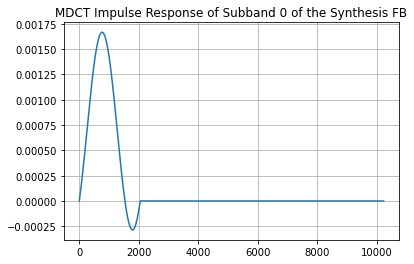

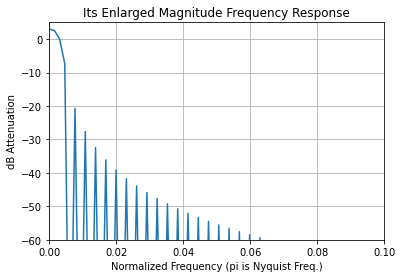

In [24]:
#Runs real time audio processing:----------------------------
N=1024 #Number of subbands and block size
display=True
#example: Sine window:
fb=np.sin(np.pi/(2*N)*(np.arange(0,int(1.5*N))+0.5))
#initialize filter bank memory:
initFB(N)
#get and plot the synthesis impulse response of subband 0:
y=np.ones((N,10))*0.0;
y[0,0]=1.0
xrek=np.ones(10*N)*0.0
for m in range(10):
    xrek[(m*N):((m+1)*N)]=LDFBinv(y[:,m],fb)
#Plots synthesis impulse response of subband 0:
plt.figure()
plt.plot(xrek)
plt.title('MDCT Impulse Response of Subband 0 of the Synthesis FB')
w,H=freqz(xrek,worN=2048)
plt.grid()
plt.figure()
plt.plot(w,20*np.log10(np.abs(H)+1e-6))
#Enlarge normalized frequencies in range of 0 to 0.1:
plt.axis([0, 0.1, -60,5])
plt.title('Its Enlarged Magnitude Frequency Response') 
plt.ylabel('dB Attenuation')
plt.xlabel('Normalized Frequency (pi is Nyquist Freq.)')
plt.grid()



In [3]:
# Signal Processing Parameters

N=512                          # Number of subbands and block size
CHUNK_SIZE = N                 # Blocksize
FORMAT = pyaudio.paInt16       # Conversion format for PyAudio stream
CHANNELS = 1                   # Audio Channels
RATE = 32000                   # Sampling Rate in Hz
FFT_LEN = N                    # FFT Length  

rows=500
cols=CHUNK_SIZE
fftlen=cols
frame=0.0*np.ones((rows,cols,3));
fb=np.sin(np.pi/(2*N)*(np.arange(0,int(1.5*N))+0.5))

In [4]:
from ipywidgets import ToggleButton, Button
from ipywidgets import HBox

# GUI
toggle_run = ToggleButton(description='Stop')
button_start= Button(description='Start')

def start_button(button_start):
    thread.start()
    button_start.disabled=True
button_start.on_click(start_button)


def on_click_toggle_run(change):
    if change['new']==False:
        stream.stop_stream()
        stream.close()
        p.terminate()
        cv2.destroyAllWindows()
        plt.close()
toggle_run.observe(on_click_toggle_run, 'value')

box_buttons = HBox([button_start,toggle_run])

In [5]:
# Function to Plot MDCT

def run_mdct(toggle_run):
    while(True):
        if toggle_run.value==True:
            break
        
        #Reading from audio input stream into data with block length "CHUNK":
        data = stream.read(CHUNK_SIZE)
        #Convert from stream of bytes to a list of short integers (2 bytes here) in "samples":
        #shorts = (struct.unpack( "128h", data ))
        shorts = (struct.unpack( 'h' * CHUNK_SIZE, data ));
        samples=np.array(list(shorts),dtype=float);
        if np.max(np.abs(samples))>32000:
            print("Overload input")

        #shift "frame" 1 up:
        frame[0:(rows-1),:]=frame[1:rows,:]; 

        #This is the analysis MDCT of the input: 
        y=LDFB(samples[0:N],fb)
        
        #yfilt is the processed subbands, processing goes here:
        yfilt=y

        #Waterfall color mapping:
        R=0.25*np.log((np.abs(yfilt/np.sqrt(fftlen))+1))/np.log(10.0)
        #Red frame:
        frame[rows-1,:,2]=R
        #Green frame:
        frame[rows-1,:,1]=np.abs(1-2*R)
        #Blue frame:
        frame[rows-1,:,0]=1.0-R
        #frame[rows-1,:,0]=frame[rows-1,:,1]**3
        # Display the resulting frame
        cv2.imshow('MDCT Waterfall (end with "q")',frame)
        
        #Inverse, Synthesis filter bank:
        #Inverse/synthesis MDCT:
        xrek=LDFBinv(yfilt,fb).astype(int);
        if np.max(np.abs(xrek))>32000:
            print("Overload output")
        xrek=np.clip(xrek, -32000, 32000)
        
        
        #converting from short integers to a stream of bytes in "data":
        #data=struct.pack('h' * len(samples), *samples);
        data=struct.pack('h' * len(xrek), *xrek);
        #Writing data back to audio output stream: 
        stream.write(data, CHUNK_SIZE)

        #Keep window open until key 'q' is pressed:
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    # When everything done, release the capture
    stream.stop_stream()
    stream.close()
    p.terminate()
    cv2.destroyAllWindows()

In [6]:
# Create a Thread for run_spectrogram function
thread = threading.Thread(target=run_mdct, args=(toggle_run,))

In [7]:
# Start Audio Stream
# Create 
p = pyaudio.PyAudio()
    
stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                output=True,
                frames_per_buffer=CHUNK_SIZE)



input_data = stream.read(CHUNK_SIZE)
samples = np.frombuffer(input_data,np.int16)
#initialize filter bank memory:
initFB(N)

In [11]:
# Initialize Plot and Display GUI

display(box_buttons)


**Observe:** The MDCT does not have those symmetric 2 sides, it only has one side of the spectrum, with the lowest frequencies on the left side, and the hightest on the right.

If we only keep a few subbands, it sounds muffled or "narrowband".

### Extending the Length of the MDCT

In [13]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/lYpOsWYZ2Lk?rel=0" frameborder="0" allow="accelerometer; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

 - **Longer filters** are obtained with **higher order polynomials** in the polyphase matrix.
 - Approach to obtain easily invertible polyphase matrices.
 - Multiply MDCT polyphase matrix with more **easily invertible matrices** with polynomials of 1st order.
 - To control the resulting system delay: design different matrices with different needs for delay to make them causal.

 - Take the MDCT Polyphase matrix with a general window function h(n) (not nec. Sine window): 
 <br>$$\large H_{MDCT}(z)$$
 - This matrix contains polynomials of first order. Multiply it with another matrix with polynomials of first order (Schuller, 1996, 2000):
 $$\large L(z) \cdot H_{MDCT}(z)$$
 - This matrix *L(z)* needs to have a form such that again a modulated filter bank results.
 - Diamond shaped form needs to be maintained.

#### Zero-Delay Matrix

 - This matrix fulfills the conditions.
 
 <center>
    <img src='./images/ac_43_delayMat.png' width='400'>
</center>
<br>
 - Its inverse is **causal**, hence does not need a delay to make it causal:
 
<center>
    <img src='./images/ac_44_delayMat2.png' width='450'>
</center>

**Still increases filter length!**

 - **Observe:** Since the matrix has a causal inverse, it can increase the filter length of the resulting filter bank without increasing the system delay!
 - Hence adds zeros inside unit circle.
 - The coefficients $h(n)$ and $l_n$ don‘t affect the delay or the PR property, but the frequency response of the resulting filter bank.
 - Coefficients need to be found by numerical optimization.

#### Maximum-Delay Matrix

 - Maximum-Delay Matrix:
 $$\large H(z)=z^{-1}L(z^{-1})$$
 - Its inverse and delay for causality is:
 $$\large H^{-1}(z)\cdot z^{-2}=z^{-1}L^{-1}(z^{-1})$$
 - Observe: This matrix and its inverse need a delay of 2 blocks to make it causal.
 - Hence adds zeros outside the unit circle.

#### Design Method

 - Determine the total number of Zero-Delay Matrices and Maximum-Delay Matrices according to the desired filter length.
 - Determine the number of Maximum-Delay Matrices according to the desired system Delay.
 - Determine the coefficients of the matrices with numerical optimization to optimize the frequency response.
 
 - **Example:**
     - Comparison for 128 subbands.
     - Dashed line: Orthogonal filter bank, filter length 256, system delay 255 samples.
     - Solid line: Low delay filter bank, length 512, delay 255.
     
<center>
    <img src='./images/ac_45_ldfbEx.png' width='900'>
</center>   

In [12]:
%%html
<iframe width="1100" height="600" src="https://nbviewer.jupyter.org/github/GuitarsAI/MRSP_Notebooks/blob/master/MRSP_Optimization_FilterBanks.ipynb"></iframe>

#### Real-Time Example

In [1]:
# coding: utf-8 
#Program for the fast implementation of the MDCT and Low Delay analysis and synthesis filter bank.
#Gerald Schuller, Nov. 2014.
#Algorithm according to:
#G. Schuller and T. Karp: "Modulated Filter Banks with Arbitrary System Delay: Efficient Implementations and #the Time-Varying Case", IEEE Transactions on Signal Processing, March 2000, pp. 737–748 
#updated July 2016
# Ported and modified to Jupyter Notebooks by Renato Profeta, August 2020

In [2]:
# Imports and Configuration
import matplotlib.pyplot as plt

import numpy as np
import scipy.signal as signal
import pyaudio
import struct
import scipy.fftpack as spfft
from scipy.signal import freqz
import threading
import cv2
import time

In [3]:
#The Low Delay Filter Bank:------------------------------

def initFB(N):
    #initialize memory for the number of subbands N:
    Dmatrix.z=np.zeros(int(int(N/2)))
    Dinvmatrix.z=np.zeros(int(int(N/2)))
    Gmatrix.z=np.zeros((2,int(int(N/2))))
    Ginvmatrix.z=np.zeros((2,int(int(N/2))))
    H2matrix.z=np.zeros(N)
    H2invmatrix.z=np.zeros(N)
    return

#The D(z) matrix:
def Dmatrix(samples):
    #implementation of the delay matrix D(z)
    #Delay elements:
    N=len(samples)
    out=np.zeros(N)
    out[0:(int(int(N/2)))]=Dmatrix.z
    Dmatrix.z=samples[0:(int(int(N/2)))]
    out[int(int(N/2)):N]=samples[int(int(N/2)):N]
    return out

#The inverse D(z) matrix:
def Dinvmatrix(samples):
    #implementation of the delay matrix D(z)
    #Delay elements:
    N=len(samples)
    out=np.zeros(N)
    out[(int(int(N/2))):N]=Dinvmatrix.z
    Dinvmatrix.z=samples[(int(int(N/2))):N]
    out[0:int(int(N/2))]=samples[0:int(int(N/2))]
    return out

#The symmetric F Matrix function:
#implements multiplication samples*symFmatrix 
def symFmatrix(samples,fcoeff):
    sym=1.0;
    N=len(samples)
    out=np.zeros(N)
    out[0:(int(int(N/2)))]=(fcoeff[0:(int(int(N/2)))]*samples[0:(int(int(N/2)))])[::-1] +fcoeff[(int(int(N/2))):N]*samples[(int(int(N/2))):N]
    out[(int(int(N/2))):N]=(fcoeff[N:(N+int(int(N/2)))]*samples[0:(int(int(N/2)))]) 
    #+-1=det([a,b;c,d]) =a*d-b*c => d=(+-1+b*c)/a:
    ff= (-sym*np.ones(int(int(N/2)))+ fcoeff[N:int(1.5*N)][::-1]*fcoeff[(int(int(N/2))):N])/fcoeff[0:(int(int(N/2)))][::-1]
    out[(int(int(N/2))):N]= out[(int(int(N/2))):N] +(ff*samples[(int(int(N/2))):N])[::-1]
    return out

def symFinvmatrix(samples,fcoeff):
    #inverse symFamtrix, uses order for the synthesis F matrix as shown in Audio Coding lecture FB2,
    #but with coefficients in reverse order, since the lecture has h as a window and not impulse response.
    #That is also why the negative signa has to be moved from the end to the beginning:
    sym=1.0
    N=len(samples)
    out=np.zeros(N)
    ff= (-sym*np.ones(int(int(N/2)))+ fcoeff[N:int(1.5*N)][::-1]*fcoeff[(int(int(N/2))):N])/fcoeff[0:(int(int(N/2)))][::-1]

    out[0:(int(int(N/2)))]=-ff[::-1]*(samples[0:(int(int(N/2)))][::-1])+fcoeff[int(0.5*N):N][::-1]*samples[(int(int(N/2))):N]
    out[(int(int(N/2))):N]=fcoeff[N:int(1.5*N)][::-1]*samples[0:(int(int(N/2)))]- fcoeff[0:int(0.5*N)][::-1]*(samples[(int(int(N/2))):N][::-1])
    return out

#The G_i(z) matrix:
def Gmatrix(i,samples,ecoeff):
    #implementation of the delay matrix G(z)
    N=len(samples)
    #Anti-diagonal ones, flip input:
    out=samples[::-1]
    #Delay elements and coeff in the upper half of the diagonal:
   
    out[0:(int(N/2))]=out[0:(int(N/2))]+Gmatrix.z[i] * ecoeff
    Gmatrix.z[i]=samples[0:(int(N/2))]
    return out

#The inverse G_i(z) matrix:
def Ginvmatrix(i,samples,ecoeff):
    #implementation of the delay matrix G(z)
    N=len(samples)
    #Anti-diagonal ones, flip input:
    out=samples[::-1]
    #Delay elements and flipped, neg. coeff in the lower half of the diagonal:
    out[(int(N/2)):N]=out[(int(N/2)):N] - Ginvmatrix.z[i] * ecoeff[::-1]
    Ginvmatrix.z[i]=samples[(int(N/2)):N]
    return out

#The H2(z) matrix:
def H2matrix(samples,H2coeff):
    #implementation of the delay matrix G(z)
    N=len(samples)
    #Anti-diagonal delays, flip delayed input:
    out=H2matrix.z[::-1]
    #input mult. with coeff in the upper half of the diagonal:
    out[0:(int(N/2))]=out[0:(int(N/2))]+ samples[0:(int(N/2))]* H2coeff
    H2matrix.z=samples
    return out

#The inverse H2(z) matrix:
def H2invmatrix(samples,H2coeff):
#implementation of the delay matrix G(z)
    N=len(samples)
    #Anti-diagonal delays, flip delayed input:
    out=H2invmatrix.z[::-1]
    #input mult. with neg. flipped coeff in the lower half of the diagonal:
   
    out[(int(N/2)):N]=out[(int(N/2)):N]- samples[(int(N/2)):N]* H2coeff[::-1]
    H2invmatrix.z=samples
    return out

#The DCT4 transform:
def DCT4(samples):
    #use a DCT3 to implement a DCT4:
    N=len(samples)
    samplesup=np.zeros(2*N)
    #upsample signal:
    samplesup[1::2]=samples
    y=spfft.dct(samplesup,type=3)/2
    return y[0:N]

#The complete LDFB, Analysis:
def LDFB(samples,fb):
    #samples: N samples of input signal
    #fb: filter bank coefficients
    N=len(samples)
    #load LDFB coefficients:
    #Fmatrix:
    fcoeff=fb[0:int(1.5*N)]
    #G_0 matrix:
    g0coeff=fb[int(1.5*N):(2*N)]
    #G1 matrix:
    g1coeff=fb[(2*N):int(2.5*N)]
 
    y=symFmatrix(samples, fcoeff)
    y=Dmatrix(y)
    y=Gmatrix(0,y,g0coeff)
    y=Gmatrix(1,y,g1coeff)
    y=DCT4(y)
    return y

#The inverse LDFB, synthesis:
def LDFBinv(y,fb): 
    #y: N subband samples or frequency coefficients
    #fb: filter bank coefficients
    N=len(y)
    #load LDFB coefficients:
    #Fmatrix:
    fcoeff=fb[0:int(1.5*N)]
    #G_0 matrix:
    g0coeff=fb[int(1.5*N):(2*N)]
    #G1 matrix:
    g1coeff=fb[(2*N):int(2.5*N)]
    
    #inverse DCT4 is identical to DCT4:
    x=DCT4(y)*2/N
    x=Ginvmatrix(1,x,g1coeff)
    x=Ginvmatrix(0,x,g0coeff)
    #inverse D(z) matrix:
    x=Dinvmatrix(x)
    #inverse F matrix:
    x=symFinvmatrix(x,fcoeff)
    return x

In [4]:
#Load the LDFB coefficients from text file:
#256 taps, 127 delay, 64 subbands:

N=512 #Number of subbands and block size
fb=np.loadtxt('./fb2048t1023d512bbitcs.mat')
     
#We assume a symmetric F matrix (det=1), hence we
#only need the first 1.N coefficients of F, not 2N:
fbsym=np.append(fb[:int(1.5*N)],fb[2*N:])
fb=fbsym
print("fbsym=", fbsym)

fbsym= [-0.06916561 -0.07012879 -0.07110412 ...  0.07072639  0.0699022
  0.06908017]


fbsym= [-0.06916561 -0.07012879 -0.07110412 ...  0.07072639  0.0699022
  0.06908017]


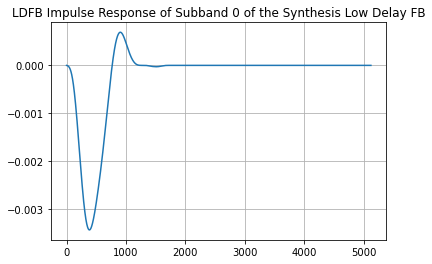

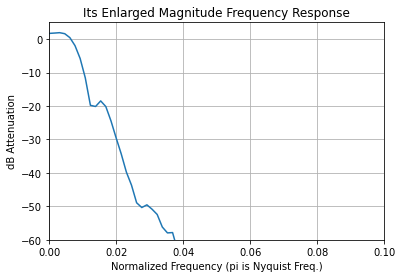

In [16]:
#example: Sine window:
#fb=np.sin(np.pi/(2*N)*(np.arange(0,int(1.5*N))+0.5))
     
display=True
     
#initialize filter bank memory:
initFB(N)
#get and plot the synthesis impulse response of subband 0: 
y=np.ones((N,10))*0.0;
y[0,0]=1.0
xrek=np.ones(10*N)*0.0
for m in range(10):
    xrek[(m*N):((m+1)*N)]=LDFBinv(y[:,m],fb)
#Plots synthesis impulse response of subband 0:
plt.figure()
plt.plot(xrek)
plt.title('LDFB Impulse Response of Subband 0 of the Synthesis Low Delay FB')
plt.grid()

w,H=freqz(xrek,worN=2048)
plt.figure()
plt.plot(w,20*np.log10(np.abs(H)+1e-6))
#Enlarge normalized frequencies in range of 0 to 0.1:
plt.axis([0, 0.1, -60,5])
plt.title('Its Enlarged Magnitude Frequency Response') 
plt.ylabel('dB Attenuation')
plt.xlabel('Normalized Frequency (pi is Nyquist Freq.)')
plt.grid()

In [5]:
# Signal Processing Parameters

N=512                          # Number of subbands and block size
CHUNK_SIZE = N                 # Blocksize
FORMAT = pyaudio.paInt16       # Conversion format for PyAudio stream
CHANNELS = 1                   # Audio Channels
RATE = 32000                   # Sampling Rate in Hz
FFT_LEN = N                    # FFT Length  

rows=500
cols=CHUNK_SIZE
fftlen=cols
frame=0.0*np.ones((rows,cols,3));

In [6]:
from ipywidgets import ToggleButton, Button
from ipywidgets import HBox

# GUI
toggle_run = ToggleButton(description='Stop')
button_start= Button(description='Start')

def start_button(button_start):
    thread.start()
    button_start.disabled=True
button_start.on_click(start_button)


def on_click_toggle_run(change):
    if change['new']==False:
        stream.stop_stream()
        stream.close()
        p.terminate()
        cv2.destroyAllWindows()
        plt.close()
toggle_run.observe(on_click_toggle_run, 'value')

box_buttons = HBox([button_start,toggle_run])

In [7]:
# Function to Plot MDCT

def run_mdct(toggle_run):
    while(True):
        if toggle_run.value==True:
            break
        
        #Reading from audio input stream into data with block length "CHUNK":
        data = stream.read(CHUNK_SIZE)
        #Convert from stream of bytes to a list of short integers (2 bytes here) in "samples":
        #shorts = (struct.unpack( "128h", data ))
        shorts = (struct.unpack( 'h' * CHUNK_SIZE, data ));
        samples=np.array(list(shorts),dtype=float);
        if np.max(np.abs(samples))>32000:
            print("Overload input")

        #shift "frame" 1 up:
        frame[0:(rows-1),:]=frame[1:rows,:]; 

        #This is the analysis MDCT of the input: 
        y=LDFB(samples[0:N],fb)
        
        #yfilt is the processed subbands, processing goes here:
        yfilt=y

        #Waterfall color mapping:
        R=0.25*np.log((np.abs(yfilt/np.sqrt(fftlen))+1))/np.log(10.0)
        #Red frame:
        frame[rows-1,:,2]=R
        #Green frame:
        frame[rows-1,:,1]=np.abs(1-2*R)
        #Blue frame:
        frame[rows-1,:,0]=1.0-R
        #frame[rows-1,:,0]=frame[rows-1,:,1]**3
        # Display the resulting frame
        cv2.imshow('MDCT Waterfall (end with "q")',frame)
        
        #Inverse, Synthesis filter bank:
        #Inverse/synthesis MDCT:
        xrek=LDFBinv(yfilt,fb).astype(int);
        if np.max(np.abs(xrek))>32000:
            print("Overload output")
        xrek=np.clip(xrek, -32000, 32000)
        
        
        #converting from short integers to a stream of bytes in "data":
        #data=struct.pack('h' * len(samples), *samples);
        data=struct.pack('h' * len(xrek), *xrek);
        #Writing data back to audio output stream: 
        stream.write(data, CHUNK_SIZE)

        #Keep window open until key 'q' is pressed:
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    # When everything done, release the capture
    stream.stop_stream()
    stream.close()
    p.terminate()
    cv2.destroyAllWindows()

In [8]:
# Create a Thread for run_spectrogram function
thread = threading.Thread(target=run_mdct, args=(toggle_run,))

In [9]:
# Start Audio Stream
# Create 
p = pyaudio.PyAudio()
    
stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                output=True,
                frames_per_buffer=CHUNK_SIZE)



input_data = stream.read(CHUNK_SIZE)
samples = np.frombuffer(input_data,np.int16)
#initialize filter bank memory:
initFB(N)

In [10]:
# Initialize Plot and Display GUI

display(box_buttons)
